In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np

In [91]:
# Load the data
file_path = '/home/69a75dc5-ad63-486d-8dbd-271a53b9786b/NOC INCIDENTS_REVISED.xlsx'  # Use forward slashes or raw string to avoid escape characters
data = pd.read_excel(file_path)

In [93]:
# Convert 'Open Time' and 'Resolved Time' to datetime
data['Open Time'] = pd.to_datetime(data['Open Time'])
data['Resolved Time'] = pd.to_datetime(data['Resolved Time'])

In [95]:
# Extract day, month, and year from 'Open Time'
data['Year'] = data['Open Time'].dt.year
data['Month'] = data['Open Time'].dt.month
data['Day'] = data['Open Time'].dt.day

In [97]:
# Filter data for the last few months to predict July 2024 trends
recent_months_data = data[data['Open Time'] >= '2024-01-01']

In [99]:
# Group by 'Year', 'Month', 'Day', 'Area', and 'Subcategory' to see the number of incidents
daily_trends = recent_months_data.groupby(['Year', 'Month', 'Day', 'Area', 'Subcategory']).size().reset_index(name='Incident Count')

In [101]:
# Calculate the average daily incidents for each 'Area' and 'Day' for July
average_daily_trends = daily_trends.groupby(['Area', 'Day'])['Incident Count'].mean().reset_index(name='Average Daily Incident Count')

In [103]:
# Create a placeholder for future July 2024 data
# Assuming the days in July go from 1 to 31
days_in_july = range(1, 32)
forecasted_data = []

for area in average_daily_trends['Area'].unique():
    for day in days_in_july:
        avg_incident_count = average_daily_trends[(average_daily_trends['Area'] == area) & (average_daily_trends['Day'] == day)]['Average Daily Incident Count']
        if not avg_incident_count.empty:
            forecasted_data.append([area, day, avg_incident_count.values[0]])
        else:
            forecasted_data.append([area, day, 0])

forecasted_df = pd.DataFrame(forecasted_data, columns=['Area', 'Day', 'Average Daily Incident Count'])


In [105]:
# Pivot the data for the heatmap using 'Area' instead of 'Subcategory'
pivot_table = forecasted_df.pivot_table(index='Area', columns='Day', values='Average Daily Incident Count', fill_value=0)

In [107]:
# Define the custom colors for the colormap
colors = ['white', 'green', 'yellow', 'red']
cmap = mcolors.ListedColormap(colors)

In [109]:
# Define a normalization that will map 0 to the first color (white) and anything else to the second and third colors
norm = mcolors.BoundaryNorm(boundaries=[-0.5, 1.0, 2.0, 4.5, 10.0], ncolors=4)

In [111]:
# Function to plot heatmap for a chunk of areas
def plot_heatmap(chunk, chunk_num):
    plt.figure(figsize=(15, 10))
    sns.heatmap(chunk, annot=True, cmap=cmap, norm=norm, linewidths=1, linecolor='black', cbar=False)

    plt.title(f'Heatmap of Forecasted Average Daily Incident Count for July 2024 (Areas {chunk_num * 25 + 1} to {(chunk_num + 1) * 25})')
    plt.xlabel('Day of the Month')
    plt.ylabel('Area')
    plt.xticks(rotation=45)
    plt.show()


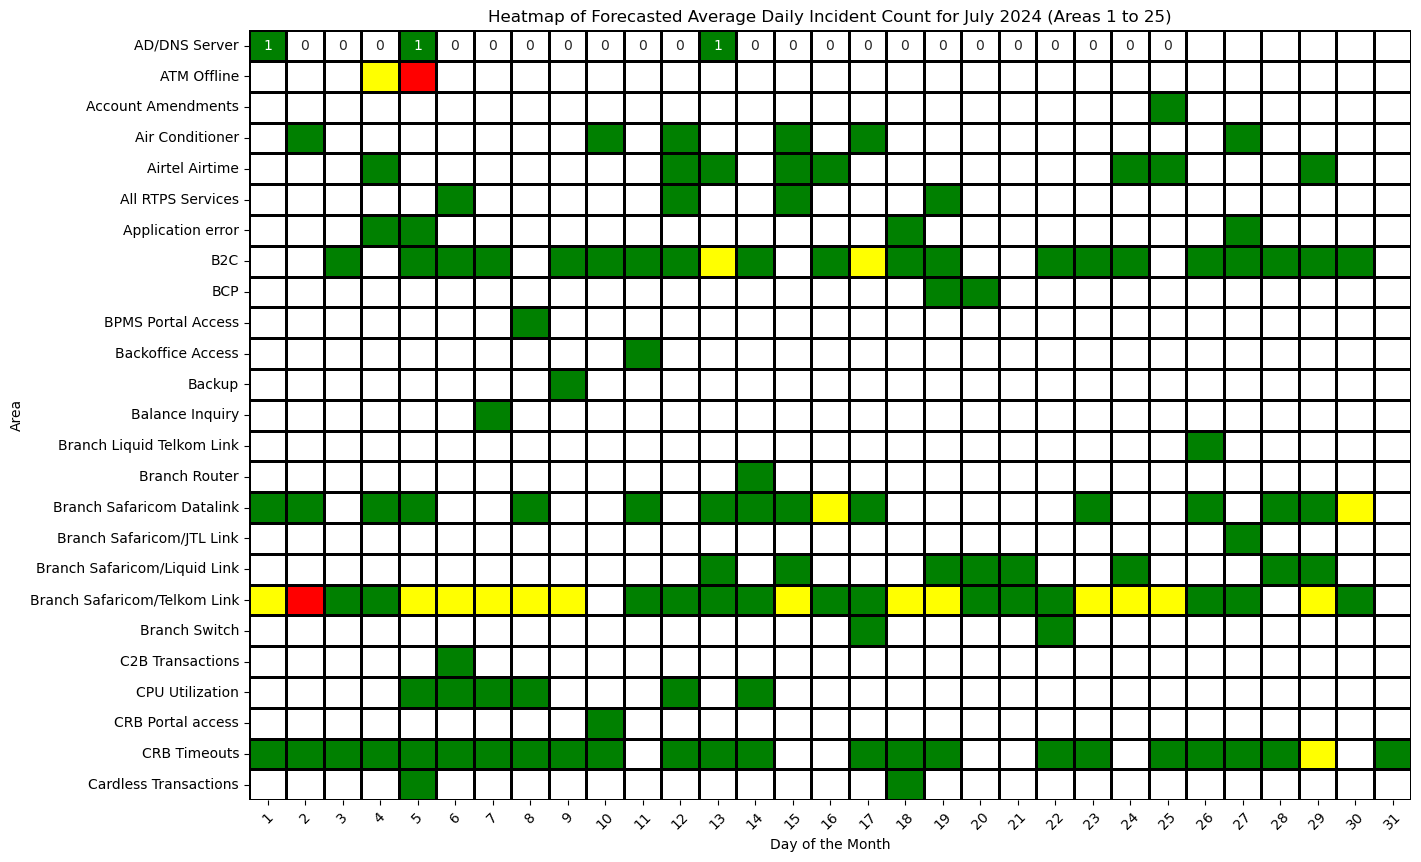

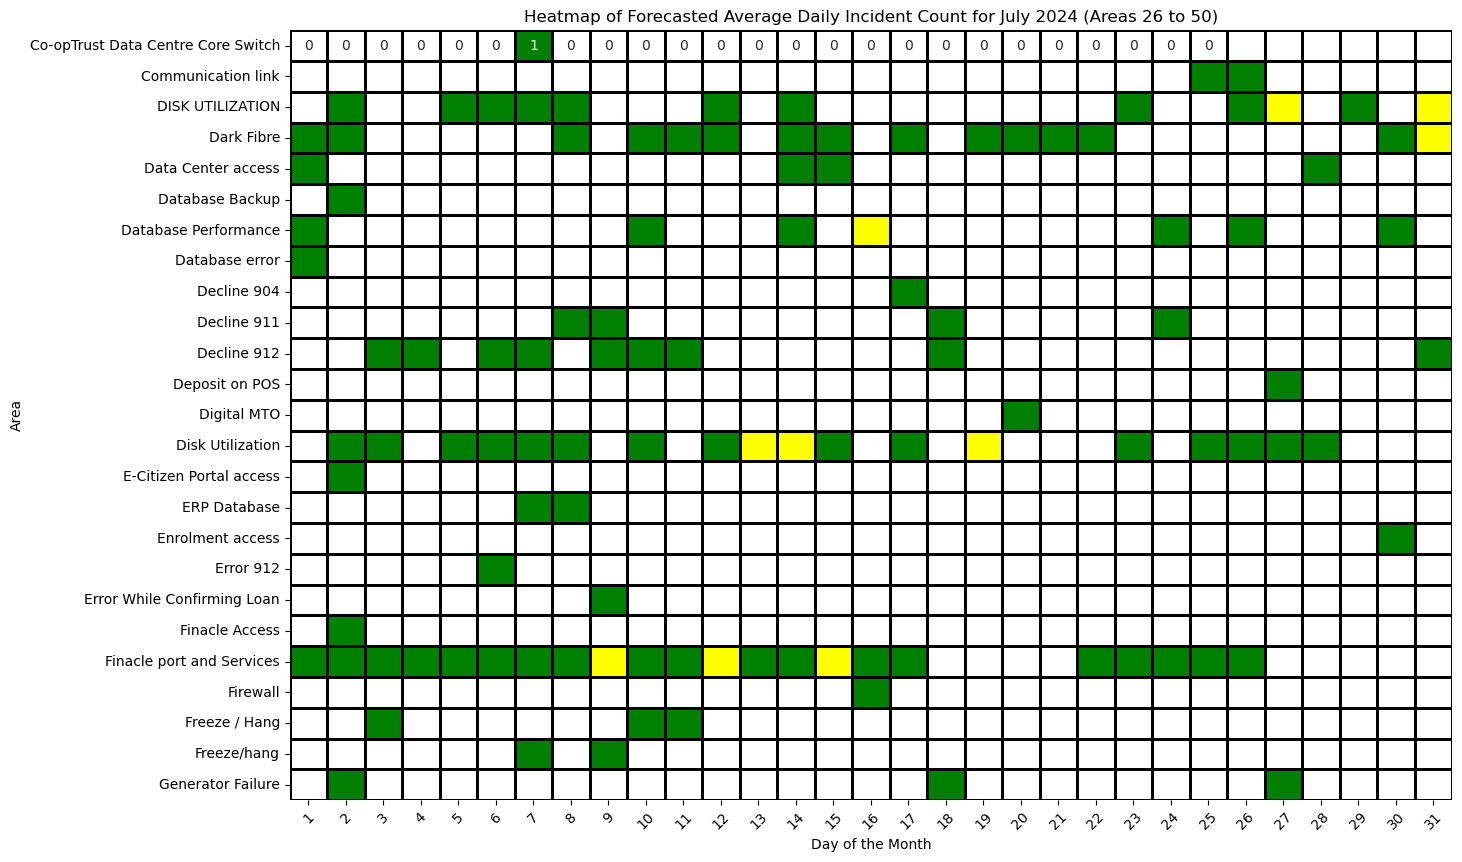

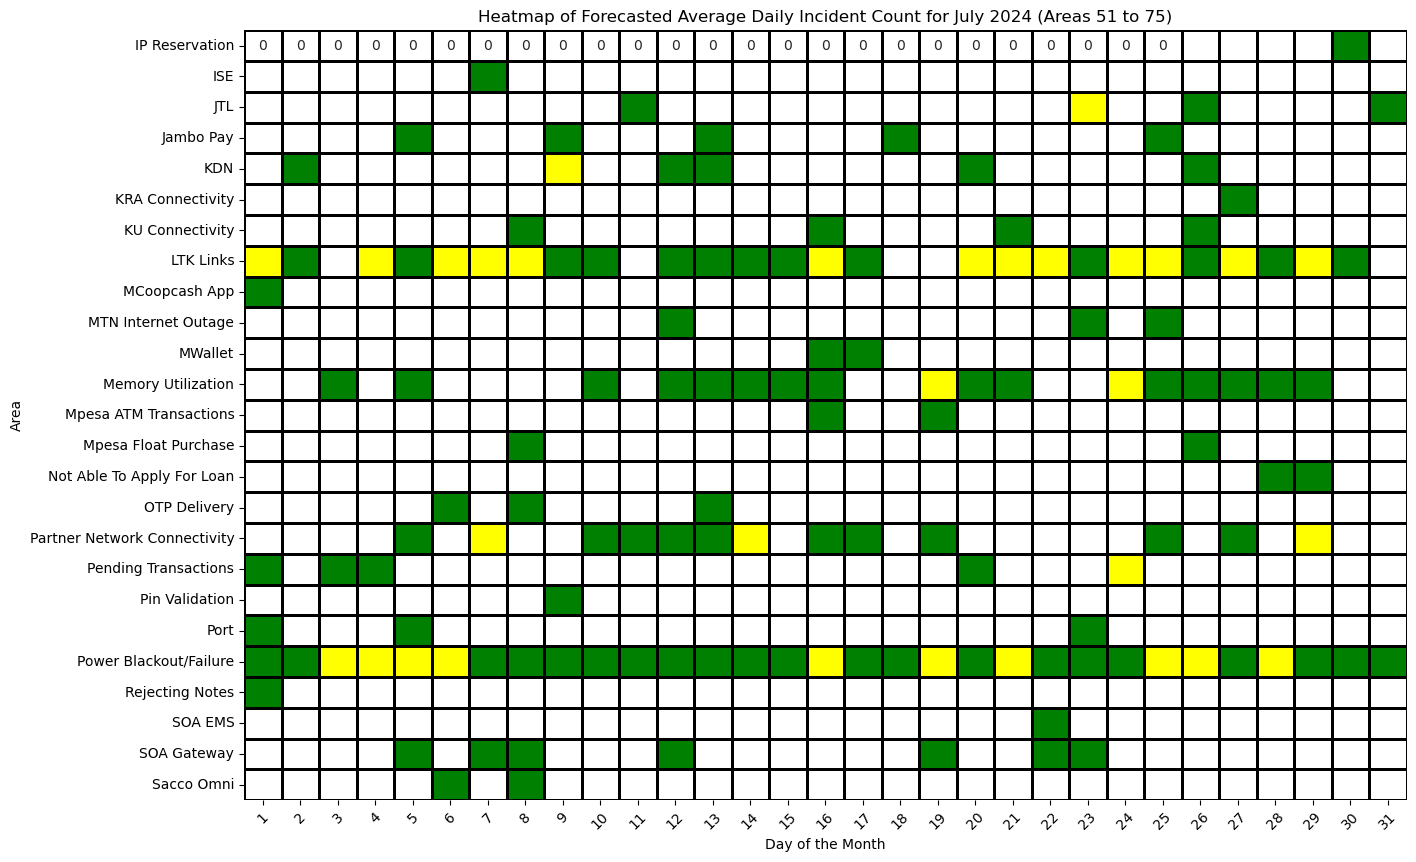

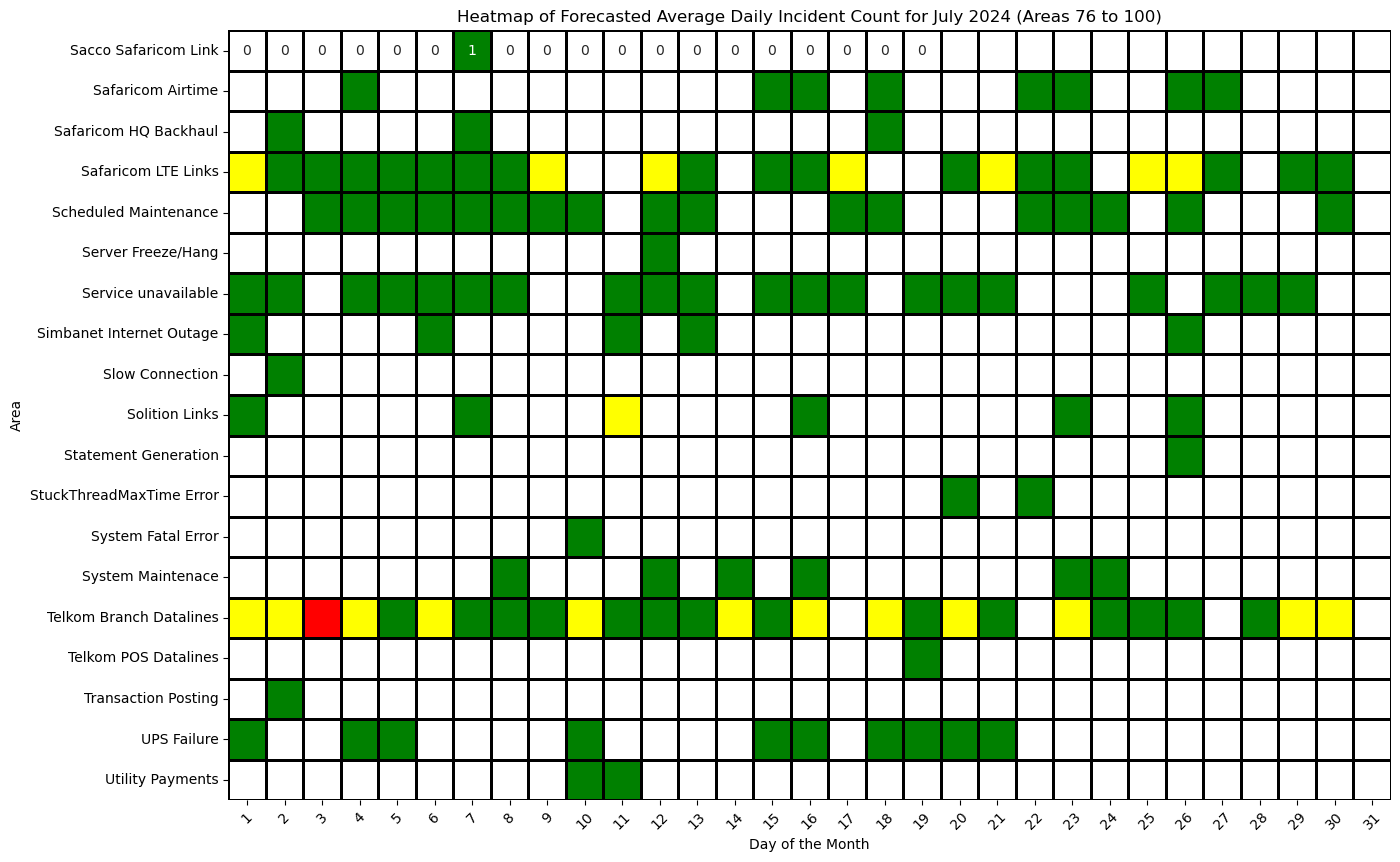

In [113]:
# Split the pivot_table into chunks of 25 areas
num_chunks = (len(pivot_table) // 25) + 1
for i in range(num_chunks):
    chunk = pivot_table.iloc[i*25:(i+1)*25]
    plot_heatmap(chunk, i)